In [ ]:
import pandas as pd # Importing relevant modules
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats
import pyodbc

In [ ]:
connection = pyodbc.connect(r'DRIVER={ODBC Driver 17 for SQL Server};' 
    r'SERVER=[SERVER NAME];'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
    r'TrustServerCertificate=yes;') # Here we set up the connection to connect to the server.

In [46]:
query1a = """SELECT CountryRegionCode, SUM(SalesYTD) AS TotalSalesYTD
FROM Sales.SalesTerritory
GROUP BY CountryRegionCode
ORDER BY TotalSalesYTD ASC"""

In [47]:
df1a = pd.read_sql(query1a, connection)
df1a['SalesMillions'] = df1a['TotalSalesYTD']/1000000

C:\Users\rache\AppData\Local\Temp\ipykernel_11368\3485766563.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1a = pd.read_sql(query1a, connection)


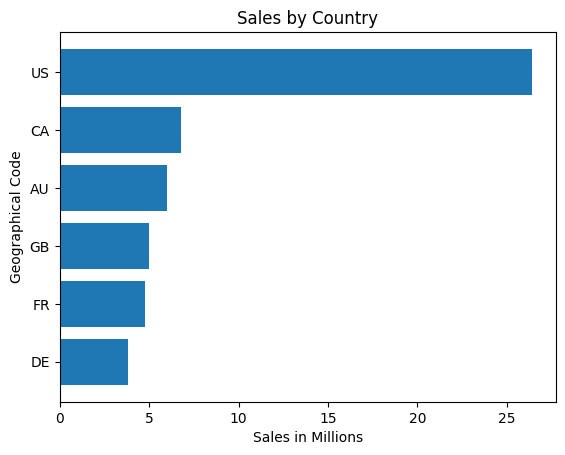

In [48]:
plt.barh(df1a['CountryRegionCode'], df1a['SalesMillions'])
plt.xlabel('Sales in Millions')
plt.ylabel('Geographical Code')
plt.title('Sales by Country')
plt.show()

In [52]:
# We use triple quotes below to encapsulate a larger SQL query.
query1b = """SELECT Name, SUM(SalesYTD) AS TotalSalesYTD 
FROM Sales.SalesTerritory
WHERE CountryRegionCode = 'US'
GROUP BY Name
ORDER BY TotalSalesYTD ASC""" # This query will select the sales YTD from the US regions, as the US is the region with the greatest sales.

In [53]:
df1b = pd.read_sql(query1b, connection)
df1b['SalesMillions'] = df1b['TotalSalesYTD']/1000000

C:\Users\rache\AppData\Local\Temp\ipykernel_11368\3242283687.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1b = pd.read_sql(query1b, connection)


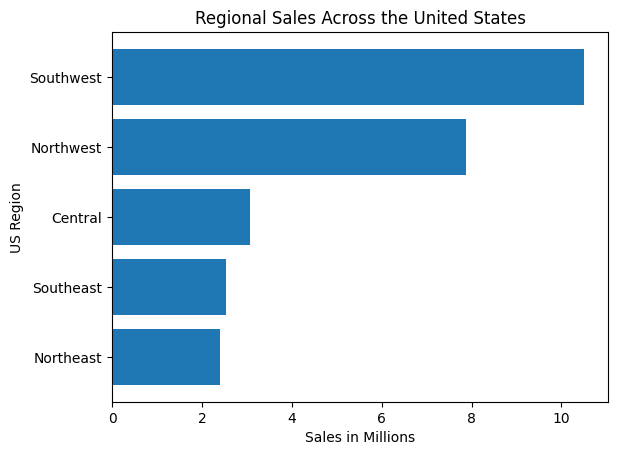

In [54]:
plt.barh(df1b.Name, df1b['SalesMillions'])
plt.xlabel('Sales in Millions')
plt.ylabel('US Region')
plt.title('Regional Sales Across the United States')
plt.show()